# Project work: Analysis of the "Adult dataset" (Part Three)

### Libraries:

Importation of useful libreries for all the data analysis's steps

In [1]:
#Ordinary Libraries for Data Manipulation:
import pandas as pd
pd.set_option("float_format", "{:.2f}".format)
import numpy as np
np.set_printoptions(suppress=True)

#Libraries for plotting:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#Sklearn:
from sklearn.model_selection import validation_curve
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold, LeaveOneOut, cross_val_score, GridSearchCV, RandomizedSearchCV)
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn import set_config
set_config(print_changed_only = False, display = "diagram")
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree, export_text

#Statsmodels:
from statsmodels.api import add_constant, OLS

#Warnings:
from warnings import filterwarnings
filterwarnings("ignore")

### Useful functions implemented:

In [2]:
import Functions
from Functions import *

### Decision Tree Classifier

The aim is to change the kind of model estimated to improve the prediction's metrics through the use of the non-parametric supervised model "Decision Tree Classifier"

The model will be fit on the balanced Dataframe without scaling the data because the model doesn't suffer different dimensions of the variables


**Process:**

1) Fitting of the model with standard values of its parameters 

2) Plot of the tree and consideration about its performances through the common metrics used

3) Plot of the "feature_importances" to understand if is necessary to remove some predictors

**Results:**

The model seems to be too much complex for its high number of nodes and indeed it has non performing metrics on the test set (overfitting with the train set). So the first solution can be to drop from the predictors some variables that had a poor relevance in the "feature importance" value: "sex", "race", "workclass"

In [3]:
#List containing the models estimated:

modelli_trees = []

In [4]:
#Import of the dataset:

df = pd.read_csv("Dataset_Adult_Not_Scaled.csv")
df

,exec_managerial,marginal_professions,other,prof_specialty,sales,tecnical_services,transport_moving,unemployed,age,workclass,education_num,marital_status,race,sex,hours_per_week,target,capital
0,0,0,0,0,0,0,0,0,39,0,13,0,1,0,40,0,2174
1,1,0,0,0,0,0,0,0,50,1,13,1,1,0,13,0,0
2,0,1,0,0,0,0,0,0,38,1,9,0,1,0,40,0,0
3,0,1,0,0,0,0,0,0,53,1,7,1,0,0,40,0,0
4,0,0,0,1,0,0,0,0,28,1,13,1,0,1,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,0,0,0,0,0,1,0,0,27,1,12,1,1,1,38,0,0
32550,0,0,0,0,0,1,0,0,40,1,9,1,1,0,40,1,0
32551,0,0,0,0,0,0,0,0,58,1,9,0,1,1,40,0,0
32552,0,0,0,0,0,0,0,0,22,1,9,0,1,0,20,0,0


In [5]:
#Creation of a balanced Dataframe without scaling the numerical variables following the previous method:

sezione_1 = df[df.target == 1].sample(df.target.value_counts()[1])
sezione_0 = df[df.target == 0].sample(df.target.value_counts()[1])

df_balance = sezione_0.copy()
df_balance = df_balance.merge(sezione_1, how = 'outer')
df_balance = df_balance.sample(frac = 1).reset_index(drop = True)
df_balance

,exec_managerial,marginal_professions,other,prof_specialty,sales,tecnical_services,transport_moving,unemployed,age,workclass,education_num,marital_status,race,sex,hours_per_week,target,capital
0,0,0,0,1,0,0,0,0,27,1,10,1,1,0,50,1,0
1,0,1,0,0,0,0,0,0,61,1,4,1,1,0,56,0,0
2,0,0,0,1,0,0,0,0,37,1,14,0,1,1,38,1,0
3,1,0,0,0,0,0,0,0,46,1,16,1,1,0,60,1,15024
4,0,1,0,0,0,0,0,0,24,1,13,0,1,0,50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15677,0,0,0,0,0,1,0,0,27,1,10,0,1,1,40,0,0
15678,0,0,0,1,0,0,0,0,48,1,15,0,1,0,63,1,14084
15679,0,0,0,0,0,0,1,0,33,1,10,1,0,0,40,1,0
15680,0,0,0,0,0,1,0,0,23,1,13,0,0,1,45,0,0


In [6]:
#Extraction of the train and test sets:

X_train, X_test, y_train, y_test = prefitting(df_balance)

In [9]:
#Fitting the first DecisionTreeClassifier:

dt = DecisionTreeClassifier()
dct = dt.fit(X_train, y_train)
dct

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best')

In [10]:
#Levels of the tree:

dct.get_depth()

39

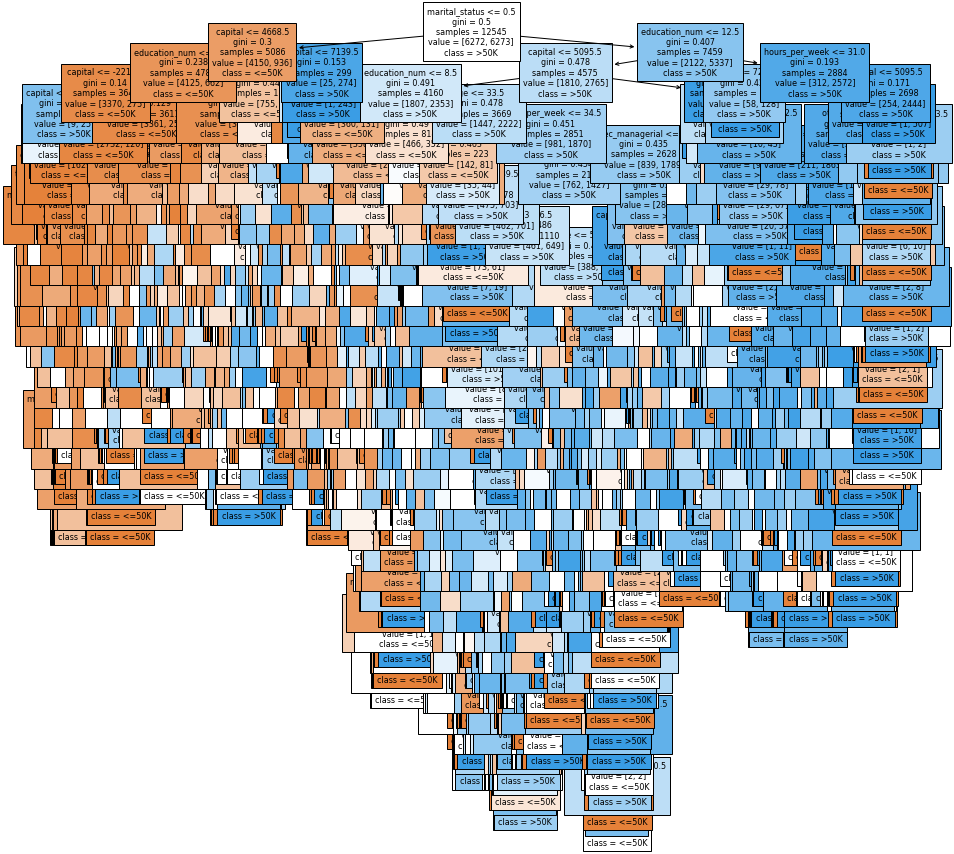

In [11]:
#Graphic representation of the DecisionTreeClassifier fitted:

plt.figure(figsize = (15, 15))
plot_tree(decision_tree = dct, 
              feature_names = df_balance.drop(columns = "target").columns, 
              class_names = ["<=50K", ">50K"],
              filled = True, fontsize = 8)
plt.show()

In [12]:
y_predict = dct.predict(X_test)

In [13]:
#Performance of the model:

metriche(y_test, y_predict)

Accuracy: 0.7653809372011476
------------------------------------------------------------------------------------------------------------------
Precision: 0.7606516290726817
------------------------------------------------------------------------------------------------------------------
Recall: 0.7742346938775511
------------------------------------------------------------------------------------------------------------------
f1: 0.7673830594184576
------------------------------------------------------------------------------------------------------------------


In [14]:
inserisci(modelli_trees, y_test, y_predict, nome =  "First Tree")

In [15]:
importances = dct.feature_importances_

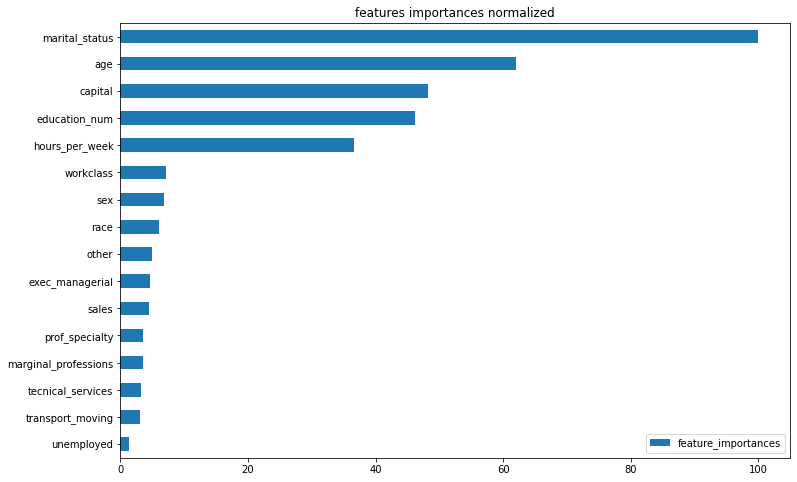

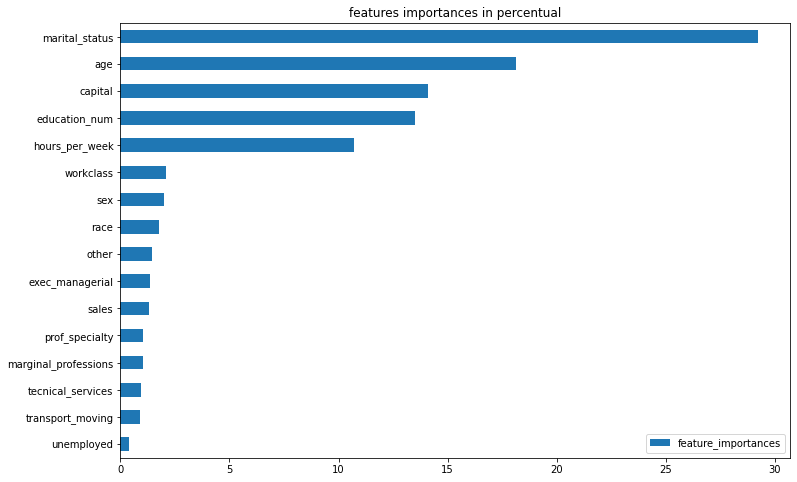

In [16]:
#Level of importance for each feature in reducing the gini index:

show_features_importances(importances, df_balance.drop(columns = "target").columns)

### Second Tree

**Aim:**

The aim is to fit another Decision Tree reducing the number of features to see if there're improvements in the model's performances over the test set

**Result:**

The model achieves an improvement in its metrics over the test set (less overfitting on the train data) but it's still too much deep so a pruining is necessary

In [19]:
#Removal of the non significant features:

X_train_2, X_test_2, y_train_2, y_test_2 = prefitting(df_balance.drop(columns = ["sex", "workclass", "race"]))

In [20]:
dt2 = DecisionTreeClassifier()
dct2 = dt2.fit(X_train_2, y_train_2)
dct2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best')

In [21]:
dct2.get_depth()

36

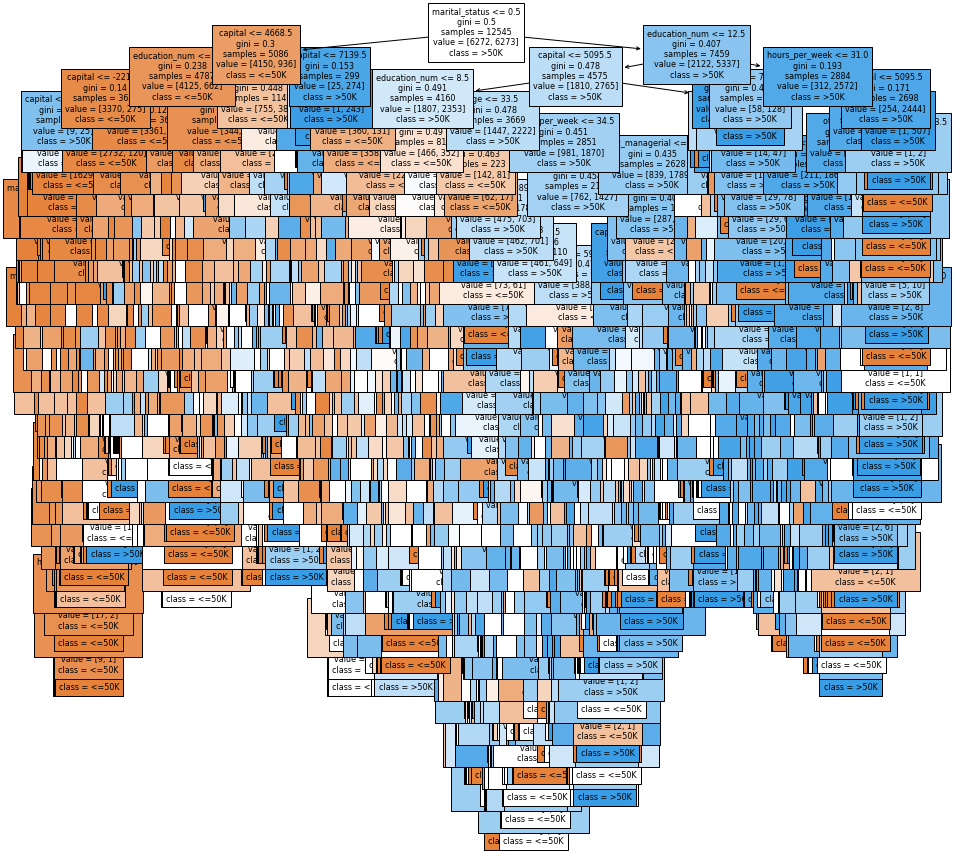

In [22]:
plt.figure(figsize=(15, 15))
plot_tree(decision_tree = dct2, 
              feature_names = df_balance.drop(columns = ["target", "sex", "workclass", "race"]).columns, 
              class_names = ["<=50K", ">50K"],
              filled = True, fontsize = 8)
plt.show()

In [23]:
y_predict_2 = dct2.predict(X_test_2)

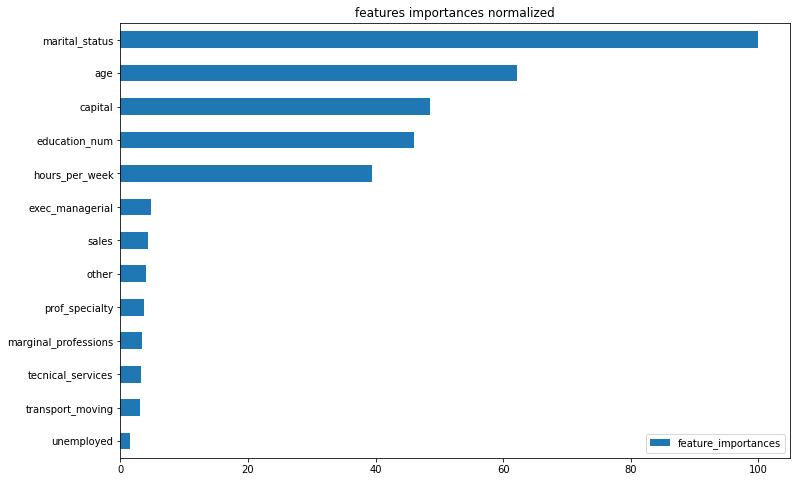

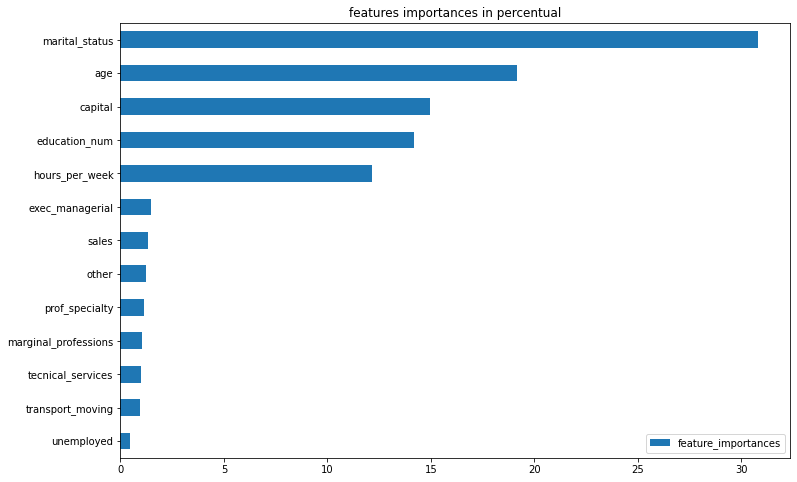

In [24]:
importances_2 = dct2.feature_importances_
show_features_importances(importances_2, df_balance.drop(columns = ["target", "sex", "workclass", "race"]).columns)

In [25]:
metriche(y_test_2, y_predict_2)

Accuracy: 0.7711189034109022
------------------------------------------------------------------------------------------------------------------
Precision: 0.7717391304347826
------------------------------------------------------------------------------------------------------------------
Recall: 0.7697704081632653
------------------------------------------------------------------------------------------------------------------
f1: 0.7707535121328224
------------------------------------------------------------------------------------------------------------------


In [26]:
inserisci(modelli_trees, y_test_2, y_predict_2, nome = "Second Tree without 'sex', 'race' and 'workclass'")

In [27]:
report(modelli_trees)

1) First Tree:

Accuracy: 0.7653809372011476
Precision: 0.7606516290726817
Recall: 0.7742346938775511
f1: 0.7673830594184576
------------------------------------------------------------------------------------------------------------------
2) Second Tree without 'sex', 'race' and 'workclass':

				Variazione dal precedente:
Accuracy: 0.7711189034109022	(0.00573796620975453)
Precision: 0.7717391304347826	(0.011087501362100904)
Recall: 0.7697704081632653	(-0.0044642857142858094)
f1: 0.7707535121328224		(0.003370452714364758)
------------------------------------------------------------------------------------------------------------------


### Validation Curves


**Aim:**

The aim is to point out how the metrics change depending on the different level chosen for the parameter "ccp_alpha" on which depends the intensity of the pruining made on the Tree. The tree used is the second one with a lower number of predictors

**Results:**

The pruining reduce the depth and improve the metrics of the Decision Tree

In [28]:
#Extraction of the value range for the pruining parameter:

path = dct2.cost_complexity_pruning_path(X_train_2, y_train_2)

In [29]:
#Extraction of 20 useful values for "alpha":

lista = np.linspace(start = 500, stop = int(len(path.ccp_alphas)*(99.128819157720891824938067712634/100)), num = 20, dtype = int)

In [30]:
#Level of impurity corresponding to "alpha":

ccp_alphas = []
impurities = []
for i in lista:
    ccp_alpha = path.ccp_alphas[i]
    impurity = path.impurities[i]
    ccp_alphas.append(ccp_alpha)
    impurities.append(impurity)

In [31]:
print("Alphas\t\t\tImpurità:")
k = 0
for i,j in zip(ccp_alphas, impurities):
    k += 1
    print(f"{i}\t{j}")
    print("-"*114)
print(f"Numero di valori: {k}")

Alphas			Impurità:
4.637849197434692e-05	0.08540328543599857
------------------------------------------------------------------------------------------------------------------
5.001602075664863e-05	0.0894814925799994
------------------------------------------------------------------------------------------------------------------
5.314202205393915e-05	0.09683372637768675
------------------------------------------------------------------------------------------------------------------
5.433891444254146e-05	0.10084538852306521
------------------------------------------------------------------------------------------------------------------
5.9784774810681545e-05	0.10739812644601045
------------------------------------------------------------------------------------------------------------------
6.263940497439036e-05	0.11393617786476741
------------------------------------------------------------------------------------------------------------------
6.471631134002782e-05	0.120064240946151

In [32]:
train_accuracy, test_accuracy = validation_curve(estimator = dct2, X = X_train_2, y = y_train_2, 
                                                 param_name = "ccp_alpha", param_range = ccp_alphas, 
                                                 cv = 5, scoring = "accuracy", n_jobs = -1)

In [33]:
train_precision, test_precision = validation_curve(estimator = dct2, X = X_train_2, y = y_train_2, 
                                                 param_name = "ccp_alpha", param_range = ccp_alphas, 
                                                 cv = 5, scoring = "precision", n_jobs = -1)

In [34]:
train_recall, test_recall = validation_curve(estimator = dct2, X = X_train_2, y = y_train_2, 
                                                 param_name = "ccp_alpha", param_range = ccp_alphas, 
                                                 cv = 5, scoring = "recall", n_jobs = -1)

In [35]:
train_f1, test_f1 = validation_curve(estimator = dct2, X = X_train_2, y = y_train_2, 
                                                 param_name = "ccp_alpha", param_range = ccp_alphas, 
                                                 cv = 5, scoring = "f1", n_jobs = -1)

In [36]:
test_accuracy_mean = test_accuracy.mean(axis = 1)
test_precision_mean = test_precision.mean(axis = 1)
test_recall_mean = test_recall.mean(axis = 1)
test_f1_mean = test_f1.mean(axis = 1)

In [37]:
#Slection of the optimal values for "alpha":

performances = [test_accuracy_mean, test_precision_mean, test_recall_mean, test_f1_mean]
alphas_ottimi = []

for performance in performances:
    k = 0
    for valore in performance:
        if (valore == performance.max()):
            indice = k
        k+=1
    alphas_ottimi.append(ccp_alphas[indice])
alphas_ottimi

[0.0003700362904071657,
 0.0003700362904071657,
 0.002382300256409814,
 0.0003700362904071657]

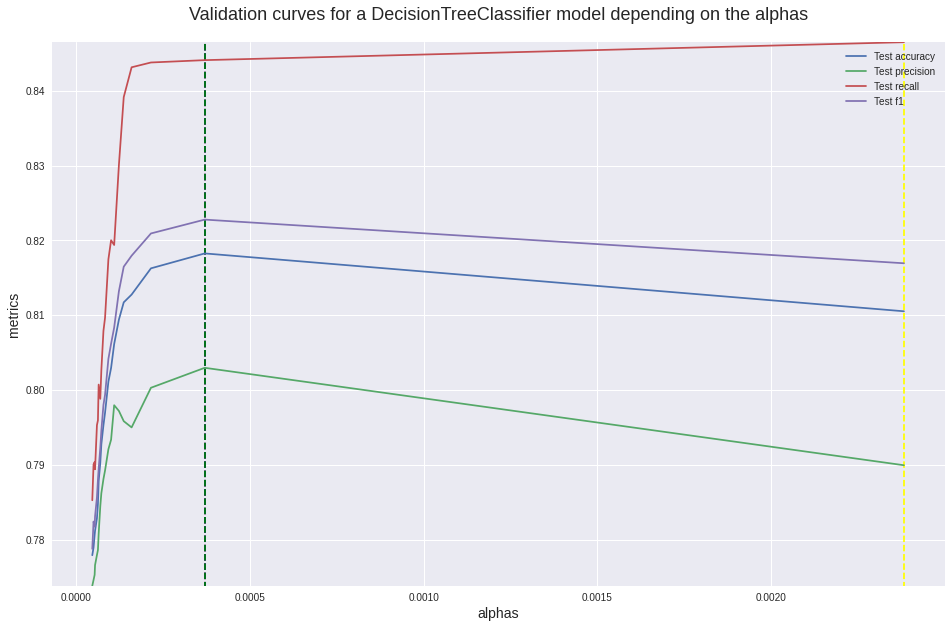

In [38]:
#Validation Curves to show the model performance depending on the pruining intensity:

plt.style.use('seaborn')
plt.figure(figsize=(16, 10))

plt.plot(ccp_alphas, test_accuracy_mean, label = 'Test accuracy')
plt.plot(ccp_alphas, test_precision_mean, label = 'Test precision')
plt.plot(ccp_alphas, test_recall_mean, label = 'Test recall')
plt.plot(ccp_alphas, test_f1_mean, label = 'Test f1')

plt.vlines(x = alphas_ottimi[0], ymin = 0, ymax = 1, color = "red", linestyles = "dashed")
plt.vlines(x = alphas_ottimi[1], ymin = 0, ymax = 1, color = "blue", linestyles = "dashed")
plt.vlines(x = alphas_ottimi[2], ymin = 0, ymax = 1, color = "yellow", linestyles = "dashed")
plt.vlines(x = alphas_ottimi[3], ymin = 0, ymax = 1, color = "green", linestyles = "dashed")

plt.ylabel('metrics', fontsize = 14)
plt.xlabel('alphas', fontsize = 14)
plt.title('Validation curves for a DecisionTreeClassifier model depending on the alphas', fontsize = 18, y = 1.03)
plt.ylim(test_precision_mean.min(), test_recall_mean.max())
plt.legend()
plt.show()

**Fitting of the Decision Tree with the best value found for parameter pruining**

In [39]:
dt3 = DecisionTreeClassifier(ccp_alpha = alphas_ottimi[0])
dct3 = dt3.fit(X_train_2, y_train_2)
dct3

DecisionTreeClassifier(ccp_alpha=0.0003700362904071657, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [40]:
dct3.get_depth()

12

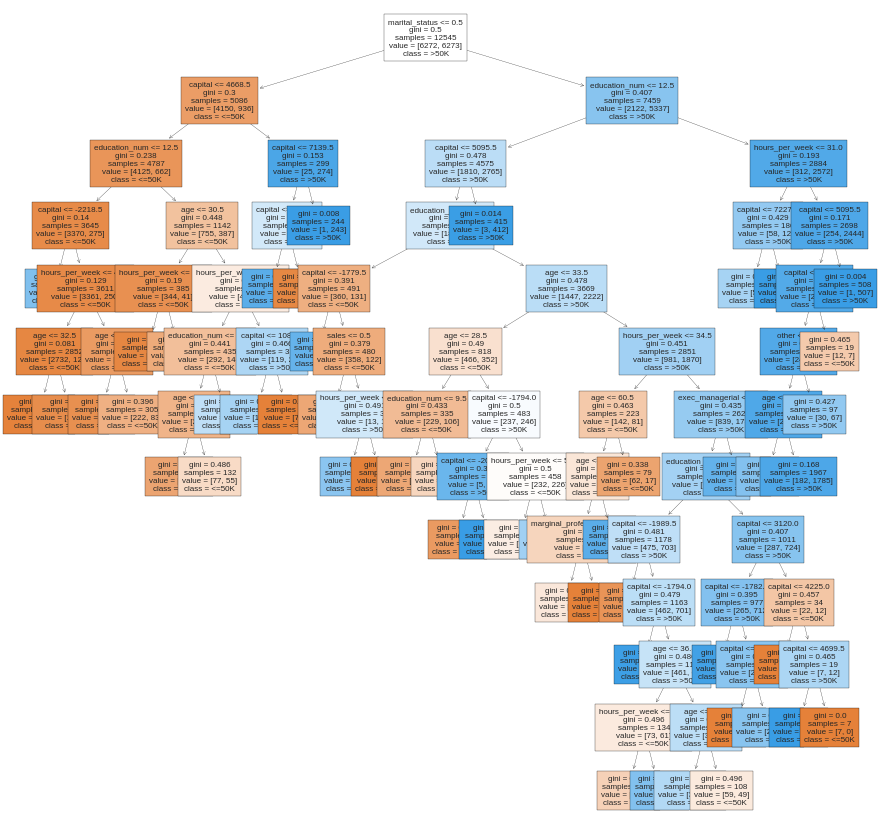

In [41]:
plt.figure(figsize = (15, 15))
plot_tree(decision_tree = dct3, 
              feature_names = df_balance.drop(columns = ["sex", "race", "workclass", "target"]).columns, 
              class_names = ["<=50K", ">50K"],
              filled = True, fontsize = 8)
plt.show()

In [42]:
y_predict_3 = dct3.predict(X_test_2)

In [43]:
metriche(y_test_2, y_predict_3)

Accuracy: 0.8106471150781001
------------------------------------------------------------------------------------------------------------------
Precision: 0.8006172839506173
------------------------------------------------------------------------------------------------------------------
Recall: 0.8271683673469388
------------------------------------------------------------------------------------------------------------------
f1: 0.8136762860727728
------------------------------------------------------------------------------------------------------------------


In [44]:
inserisci(modelli_trees, y_test_2, y_predict_3, nome = "Decision Tree after pruining")

In [45]:
report(modelli_trees)

1) First Tree:

Accuracy: 0.7653809372011476
Precision: 0.7606516290726817
Recall: 0.7742346938775511
f1: 0.7673830594184576
------------------------------------------------------------------------------------------------------------------
2) Second Tree without 'sex', 'race' and 'workclass':

				Variazione dal precedente:
Accuracy: 0.7711189034109022	(0.00573796620975453)
Precision: 0.7717391304347826	(0.011087501362100904)
Recall: 0.7697704081632653	(-0.0044642857142858094)
f1: 0.7707535121328224		(0.003370452714364758)
------------------------------------------------------------------------------------------------------------------
3) Decision Tree after pruining:

				Variazione dal precedente:
Accuracy: 0.8106471150781001	(0.03952821166719789)
Precision: 0.8006172839506173	(0.02887815351583467)
Recall: 0.8271683673469388	(0.05739795918367352)
f1: 0.8136762860727728		(0.042922773939950365)
--------------------------------------------------------------------------------------------

### Gridsearch:

**Aim:**

The aim is to do a Gridsearch process to find the best values for the Decision Tree Classifier parameters referred to the split criterion and the maximum depth

**Result:**

The model is better than before especially for the "recall" score

In [46]:
#Gridsearch for the DecisionTree depending on the split criterion, the depth and the alphas:

stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

params = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.linspace(1, 42, 20, dtype = int),
    "ccp_alpha" : ccp_alphas
}

gs = GridSearchCV(estimator = dt2, param_grid = params, scoring = "accuracy", n_jobs = -1, cv = stratified_kfold)
gs.fit(X_train_2, y_train_2)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_s...
                                       0.00010934947687777177,
                                       0.00012298582246768764,
                                       0.00013690166728503084,
                                       0.00015956174792025298,
                                       0.0002152251893184535,
                                       0.0003700362904071657,
                                       0.002382300256409814],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 16, 18, 20, 22, 24, 26, 29, 31, 33, 35,
       37, 39, 42])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [47]:
dct_GS = gs.best_estimator_

In [48]:
y_predict_GS = dct_GS.predict(X_test_2)

In [49]:
metriche(y_test_2, y_predict_GS)

Accuracy: 0.8106471150781001
------------------------------------------------------------------------------------------------------------------
Precision: 0.8006172839506173
------------------------------------------------------------------------------------------------------------------
Recall: 0.8271683673469388
------------------------------------------------------------------------------------------------------------------
f1: 0.8136762860727728
------------------------------------------------------------------------------------------------------------------


In [50]:
inserisci(modelli_trees, y_test_2, y_predict_GS, nome = "Decision tree after Gridsearch")

In [51]:
report(modelli_trees)

1) First Tree:

Accuracy: 0.7653809372011476
Precision: 0.7606516290726817
Recall: 0.7742346938775511
f1: 0.7673830594184576
------------------------------------------------------------------------------------------------------------------
2) Second Tree without 'sex', 'race' and 'workclass':

				Variazione dal precedente:
Accuracy: 0.7711189034109022	(0.00573796620975453)
Precision: 0.7717391304347826	(0.011087501362100904)
Recall: 0.7697704081632653	(-0.0044642857142858094)
f1: 0.7707535121328224		(0.003370452714364758)
------------------------------------------------------------------------------------------------------------------
3) Decision Tree after pruining:

				Variazione dal precedente:
Accuracy: 0.8106471150781001	(0.03952821166719789)
Precision: 0.8006172839506173	(0.02887815351583467)
Recall: 0.8271683673469388	(0.05739795918367352)
f1: 0.8136762860727728		(0.042922773939950365)
--------------------------------------------------------------------------------------------

### Graphic Tree

**Aim:**

The aim is to create a model with a small depth so it can be used to visualize the decision process clearly. The model will be fitted on a Dataframe in which the categorical variable "occupation" is binarized with only the modality "excecutive managerial" against all the other occupations.

To choose the best value for the depth of the Tree some validation curves are needed to point out how the metrics evolves changing the max_depth parameter

**Result:**

Un albero che evidenzia una buona rappresentazione grafica connessa a metriche adeguate è quello corrispondente alla profondità '4', il quale verrà usato come modello da rappresentazione

In [54]:
X_train_3, X_test_3, y_train_3, y_test_3 = prefitting(df_balance.drop(columns = ["marginal_professions", "other", "prof_specialty", "sales", "tecnical_services", "transport_moving", "unemployed"]))

In [55]:
dt3 = DecisionTreeClassifier(ccp_alpha = alphas_ottimi[0])
dct3 = dt3.fit(X_train_3, y_train_3)
dct3

DecisionTreeClassifier(ccp_alpha=0.0003700362904071657, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [56]:
dct3.get_depth()

12

In [57]:
profondità = [i for i in range(1, dct3.get_depth())]

In [58]:
train_accuracy_3, test_accuracy_3 = validation_curve(estimator = dt3, X = X_train_3, y = y_train_3, 
                                                 param_name = "max_depth", param_range = profondità, 
                                                 cv = 5, scoring = "accuracy", n_jobs = -1)

In [59]:
train_precision_3, test_precision_3 = validation_curve(estimator = dt3, X = X_train_3, y = y_train_3, 
                                                 param_name = "max_depth", param_range = profondità, 
                                                 cv = 5, scoring = "precision", n_jobs = -1)

In [60]:
train_recall_3, test_recall_3 = validation_curve(estimator = dt3, X = X_train_3, y = y_train_3, 
                                                 param_name = "max_depth", param_range = profondità, 
                                                 cv = 5, scoring = "recall", n_jobs = -1)

In [61]:
train_f1_3, test_f1_3 = validation_curve(estimator = dt3, X = X_train_3, y = y_train_3, 
                                                 param_name = "max_depth", param_range = profondità, 
                                                 cv = 5, scoring = "f1", n_jobs = -1)

In [62]:
test_accuracy_mean_3 = test_accuracy_3.mean(axis = 1)
test_precision_mean_3 = test_precision_3.mean(axis = 1)
test_recall_mean_3 = test_recall_3.mean(axis = 1)
test_f1_mean_3 = test_f1_3.mean(axis = 1)

In [63]:
metrics = [test_accuracy_mean_3, test_precision_mean_3, test_recall_mean_3, test_f1_mean_3]
profondità_ottimi = []

for metrica in metrics:
    k = 0
    for valore in metrica:
        if (valore == metrica.max()):
            indice = k
        k+=1
    profondità_ottimi.append(profondità[indice])
profondità_ottimi

[11, 11, 3, 8]

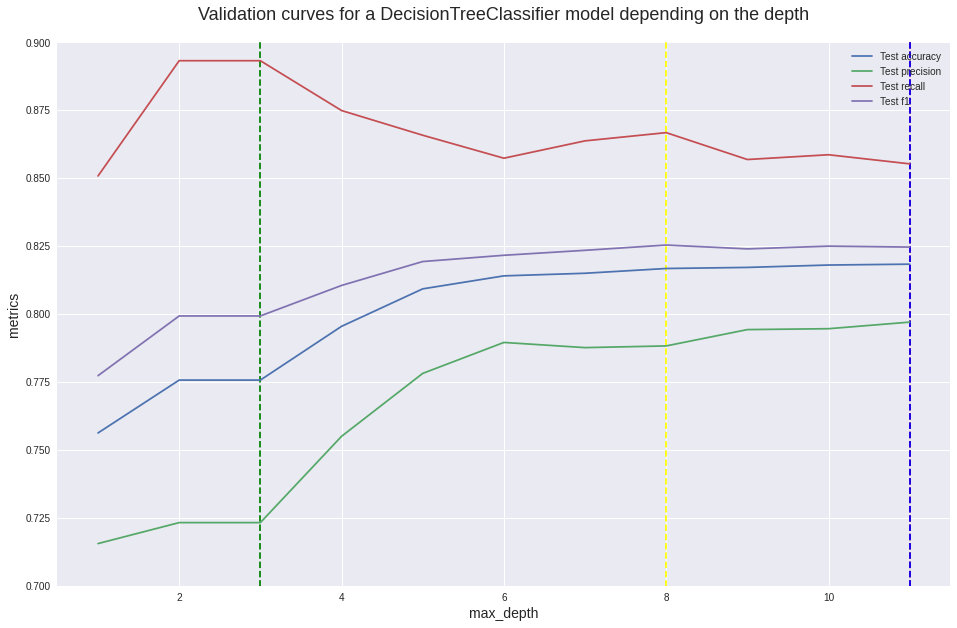

In [64]:
#Validation Curves to select a correct value for the depth to give an useul representation of the Tree:

plt.style.use('seaborn')
plt.figure(figsize=(16, 10))

plt.plot(profondità, test_accuracy_mean_3, label = 'Test accuracy')
plt.plot(profondità, test_precision_mean_3, label = 'Test precision')
plt.plot(profondità, test_recall_mean_3, label = 'Test recall')
plt.plot(profondità, test_f1_mean_3, label = 'Test f1')

plt.vlines(x = profondità_ottimi[0], ymin = 0, ymax = 1, color = "red", linestyles = "dashed")
plt.vlines(x = profondità_ottimi[1], ymin = 0, ymax = 1, color = "blue", linestyles = "dashed")
plt.vlines(x = profondità_ottimi[2], ymin = 0, ymax = 1, color = "green", linestyles = "dashed")
plt.vlines(x = profondità_ottimi[3], ymin = 0, ymax = 1, color = "yellow", linestyles = "dashed")

plt.ylabel('metrics', fontsize = 14)
plt.xlabel('max_depth', fontsize = 14)
plt.title('Validation curves for a DecisionTreeClassifier model depending on the depth', fontsize = 18, y = 1.03)
plt.ylim(0.7, 0.9)
plt.legend()
plt.show()

In [92]:
dt_r = DecisionTreeClassifier(ccp_alpha = alphas_ottimi[0], max_depth = 4)
dct_r = dt_r.fit(X_train_3, y_train_3)
dct_r

DecisionTreeClassifier(ccp_alpha=0.0003700362904071657, class_weight=None,
                       criterion='gini', max_depth=4, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [93]:
dct_r.get_depth()

4

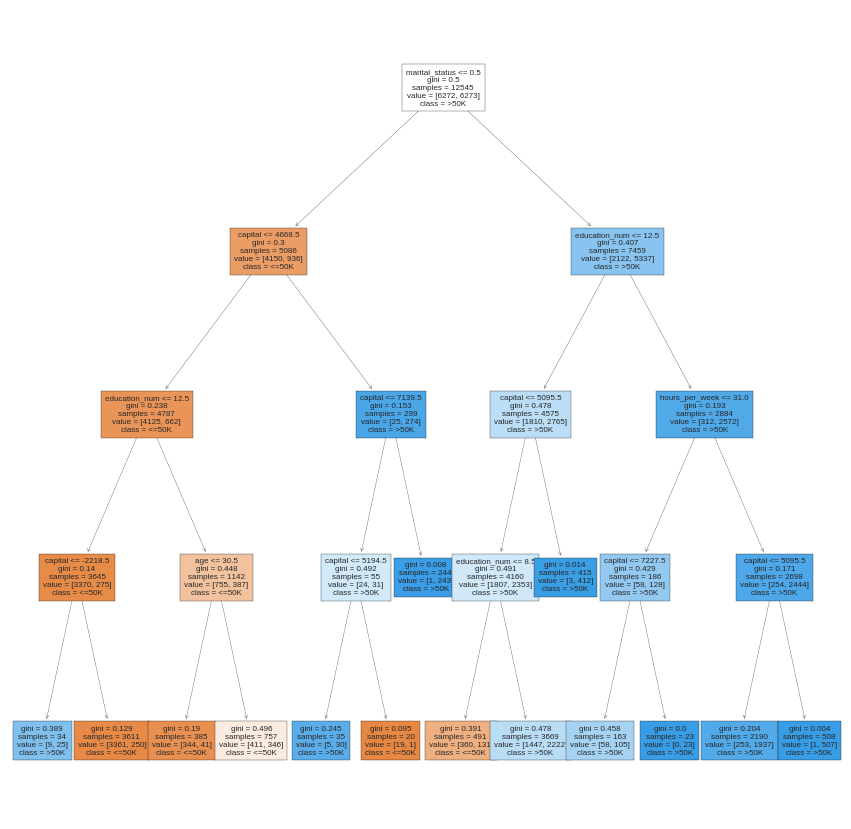

In [94]:
#Graphic plot:

plt.figure(figsize = (15, 15))
plot_tree(decision_tree = dct_r, 
              feature_names = df_balance.drop(columns = ["marginal_professions", "other", "prof_specialty", "sales", "tecnical_services", "transport_moving", "unemployed", "target"]).columns, 
              class_names = ["<=50K", ">50K"],
              filled = True, fontsize = 8)
plt.show()

In [68]:
y_predict_r = dct_r.predict(X_test_3)

In [69]:
metriche(y_test_3, y_predict_r)

Accuracy: 0.8131973222824355
------------------------------------------------------------------------------------------------------------------
Precision: 0.7857974388824214
------------------------------------------------------------------------------------------------------------------
Recall: 0.860969387755102
------------------------------------------------------------------------------------------------------------------
f1: 0.8216676810712112
------------------------------------------------------------------------------------------------------------------


In [70]:
inserisci(modelli_trees, y_test_3, y_predict_r, nome = "Graphic Tree")

In [71]:
report(modelli_trees)

1) First Tree:

Accuracy: 0.7653809372011476
Precision: 0.7606516290726817
Recall: 0.7742346938775511
f1: 0.7673830594184576
------------------------------------------------------------------------------------------------------------------
2) Second Tree without 'sex', 'race' and 'workclass':

				Variazione dal precedente:
Accuracy: 0.7711189034109022	(0.00573796620975453)
Precision: 0.7717391304347826	(0.011087501362100904)
Recall: 0.7697704081632653	(-0.0044642857142858094)
f1: 0.7707535121328224		(0.003370452714364758)
------------------------------------------------------------------------------------------------------------------
3) Decision Tree after pruining:

				Variazione dal precedente:
Accuracy: 0.8106471150781001	(0.03952821166719789)
Precision: 0.8006172839506173	(0.02887815351583467)
Recall: 0.8271683673469388	(0.05739795918367352)
f1: 0.8136762860727728		(0.042922773939950365)
--------------------------------------------------------------------------------------------

### Random Forest

The aim is to fit a RandomForest model to ensure that the DecisionTrees models estimated are more robust.

**Step:**
1) Random Forest for the initial model estimated on a balanced DataFrame

2) Examination of the obtained result in order to improve the model removing the non significant parameter

2) Gridsearch for each of the RandForest estimated to optimize the parameter

3) Validation curves to show the evolution of the model's performance depending on the different parameters given

In [72]:
modelli_rf = []

In [73]:
#Fit of the initial model:

rf = RandomForestClassifier(n_estimators = 200, oob_score = True, n_jobs = -1, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [74]:
rf.oob_score_

0.8075727381426864

In [75]:
y_predict_rf = rf.predict(X_test)
y_predict_rf

array([0, 1, 0, ..., 1, 1, 0])

In [76]:
metriche(y_test, y_predict_rf)

Accuracy: 0.8052279247688875
------------------------------------------------------------------------------------------------------------------
Precision: 0.7915904936014625
------------------------------------------------------------------------------------------------------------------
Recall: 0.8284438775510204
------------------------------------------------------------------------------------------------------------------
f1: 0.809598005609224
------------------------------------------------------------------------------------------------------------------


In [77]:
inserisci(modelli_rf, y_test, y_predict_rf, "First Random Forest model")

In [78]:
rf_2 = RandomForestClassifier(n_estimators = 200, oob_score = True, n_jobs = -1, random_state = 42, ccp_alpha = alphas_ottimi[0])
rf_2.fit(X_train_2, y_train_2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0003700362904071657,
                       class_weight=None, criterion='gini', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)

In [79]:
rf_2.oob_score_

0.8228776404942209

In [80]:
y_predict_rf_2 = rf_2.predict(X_test_2)
y_predict_rf_2

array([0, 1, 0, ..., 1, 1, 0])

In [81]:
metriche(y_test_2, y_predict_rf_2)

Accuracy: 0.8272234619062799
------------------------------------------------------------------------------------------------------------------
Precision: 0.796875
------------------------------------------------------------------------------------------------------------------
Recall: 0.8781887755102041
------------------------------------------------------------------------------------------------------------------
f1: 0.8355582524271845
------------------------------------------------------------------------------------------------------------------


In [82]:
inserisci(modelli_rf, y_test_2, y_predict_rf_2, "Random Forest a Decision Tree with pruining and less predictors")

In [83]:
report(modelli_rf)

1) First Random Forest model:

Accuracy: 0.8052279247688875
Precision: 0.7915904936014625
Recall: 0.8284438775510204
f1: 0.809598005609224
------------------------------------------------------------------------------------------------------------------
2) Random Forest a Decision Tree with pruining and less predictors:

				Variazione dal precedente:
Accuracy: 0.8272234619062799	(0.02199553713739244)
Precision: 0.796875	(0.005284506398537503)
Recall: 0.8781887755102041	(0.04974489795918369)
f1: 0.8355582524271845		(0.025960246817960497)
------------------------------------------------------------------------------------------------------------------


### Gridsearch to optimize the parameter of the RandomForest Model:

The RandomForest model chosen is the one with the DecisionTree estimator after the pruining process. 

The Gridsearch will try:

1) Different criterion to determine the split in different nodes

2) Different values for the max depth of the Trees estimated

3) Different rules to determine which parameters choose for the different trees

In [84]:
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

params = {
    "criterion": ["gini", "entropy"],
    "max_depth": np.linspace(1, 18, 5, dtype = int),
    "max_features" : ["auto", "sqrt", "log2"]
}

gs_rf = GridSearchCV(estimator = rf_2, param_grid = params, scoring = "accuracy", n_jobs = -1, cv = stratified_kfold)
gs_rf.fit(X_train_2, y_train_2)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True,
                                              ccp_alpha=0.0003700362904071657,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=-1,
                                              oob_score=True, random_state=42,
                                              verbose=0, warm_start=False),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  5,  9, 13, 18]),
                         'max_features': ['auto', 'sqrt', 'log2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [85]:
gs_rf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0003700362904071657,
                       class_weight=None, criterion='entropy', max_depth=13,
                       max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=42, verbose=0, warm_start=False)

In [86]:
gs_rf.best_score_

0.8251096054204862

In [87]:
rf_GS = gs_rf.best_estimator_

In [88]:
y_predict_rf_GS = rf_GS.predict(X_test_2)

In [89]:
metriche(y_test_2, y_predict_rf_GS)

Accuracy: 0.826585910105196
------------------------------------------------------------------------------------------------------------------
Precision: 0.7935779816513762
------------------------------------------------------------------------------------------------------------------
Recall: 0.8826530612244898
------------------------------------------------------------------------------------------------------------------
f1: 0.8357487922705314
------------------------------------------------------------------------------------------------------------------


In [90]:
inserisci(modelli_rf, y_test_2, y_predict_rf_GS, "Final Random Forest after Gridsearch")

In [91]:
report(modelli_rf)

1) First Random Forest model:

Accuracy: 0.8052279247688875
Precision: 0.7915904936014625
Recall: 0.8284438775510204
f1: 0.809598005609224
------------------------------------------------------------------------------------------------------------------
2) Random Forest a Decision Tree with pruining and less predictors:

				Variazione dal precedente:
Accuracy: 0.8272234619062799	(0.02199553713739244)
Precision: 0.796875	(0.005284506398537503)
Recall: 0.8781887755102041	(0.04974489795918369)
f1: 0.8355582524271845		(0.025960246817960497)
------------------------------------------------------------------------------------------------------------------
3) Final Random Forest after Gridsearch:

				Variazione dal precedente:
Accuracy: 0.826585910105196	(-0.0006375518010839354)
Precision: 0.7935779816513762	(-0.003297018348623837)
Recall: 0.8826530612244898	(0.004464285714285698)
f1: 0.8357487922705314		(0.0001905398433469374)
---------------------------------------------------------------